# Data Cleaning & Wrangling

## Data Retrieval

In [3]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import getpass
from sqlalchemy import create_engine

In [4]:
# fetch dataset 
online_retail = fetch_ucirepo(id=352)

In [5]:
# The original key holds the complete dataset with all eight columns
# The simplest way to get all the columns into a single DataFrame is to use the original Dataframe directly
# Extract the original DataFrame which already contains all desired columns
df = online_retail.data['original']

# Verify the columns
print(df.columns)
print(df.head())

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


## Data Cleaning

**Handling Missing Values**

In [8]:
# Check for missing values
print("Missing Values before cleaning:")
print(df.isnull().sum())

Missing Values before cleaning:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
# Fill missing values in Description with 'NA' - Description Not Available
df['Description'] = df['Description'].fillna('NA')

# Fill missing values in CustomerID with 55555 - to indicate that this order / invoice is not attached to a Customer ID
df['CustomerID'] = df['CustomerID'].fillna(55555)

# Verify that the missing values have been filled
print("Missing Values after filling:")
print(df.isnull().sum())

Missing Values after filling:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


**Handling Column Values**

In [11]:
# In the Country column convert value EIRE to Ireland and RSA to South Africa
df['Country'] = df['Country'].replace({'EIRE': 'Ireland', 'RSA': 'South Africa'})

**Handling DateTime**

In [13]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new InvoiceTime column with the format HH:MM:SS AM/PM
df['InvoiceTime'] = df['InvoiceDate'].dt.strftime('%I:%M:%S %p')  # 12-hour format with AM/PM

# Update the InvoiceDate column to the YYYY-MM-DD format
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')

# Check the result
print(df[['InvoiceDate', 'InvoiceTime']].head())

  InvoiceDate  InvoiceTime
0  2010-12-01  08:26:00 AM
1  2010-12-01  08:26:00 AM
2  2010-12-01  08:26:00 AM
3  2010-12-01  08:26:00 AM
4  2010-12-01  08:26:00 AM


**Handling Column Order**

In [15]:
# Determine your desired column order.
desired_order = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate', 'InvoiceTime']

# Reindex the DataFrame
df = df[desired_order]

# Verify the new column order
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00 AM
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00 AM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00 AM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00 AM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00 AM


**Handling Data Types**

In [17]:
# Check the data types of each column
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
CustomerID     float64
Country         object
InvoiceDate     object
InvoiceTime     object
dtype: object


In [18]:
# The CustomerID is needs to be converted to int data type
df['CustomerID'] = df['CustomerID'].astype(int)

**Handling Irrelevant Transactions**

In [20]:
# Remove values that are letter(s) only and keep only alphanumeric or completely numeric values in the StockCode column
df['StockCode'] = df['StockCode'].astype(str)  # Ensure all values in StockCode are strings
df = df[df['StockCode'].str.match(r'^[A-Za-z0-9]+$', na=False)]  # Keep alphanumeric or numeric values only

In [21]:
# Display the first few rows of the cleaned dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,2010-12-01,08:26:00 AM
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,2010-12-01,08:26:00 AM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,2010-12-01,08:26:00 AM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,2010-12-01,08:26:00 AM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,2010-12-01,08:26:00 AM


## Save Clean Data

In [23]:
# Prompt the user for MySQL login credentials
host = input("Enter MySQL host (e.g., localhost): ")
user = input("Enter MySQL username: ")
password = getpass.getpass("Enter MySQL password: ")
database = input("Enter the MySQL database name: ")

Enter MySQL host (e.g., localhost):  localhost
Enter MySQL username:  root
Enter MySQL password:  ········
Enter the MySQL database name:  clean_uci_online_retail


In [37]:
# Create the MySQL connection string
connection_string = f"mysql+pymysql://{user}:{password}@{host}/{database}"

In [39]:
# Create a SQLAlchemy engine
engine = create_engine(connection_string)

In [41]:
# Save the clean DataFrame to the MySQL database
table_name = "clean_uci_online_retail"
try:
    df.to_sql(name=table_name, con=engine, if_exists='replace', index=False)
    print(f"DataFrame successfully saved to table '{table_name}' in database '{database}'.")
except Exception as e:
    print(f"An error occurred: {e}")

DataFrame successfully saved to table 'clean_uci_online_retail' in database 'clean_uci_online_retail'.


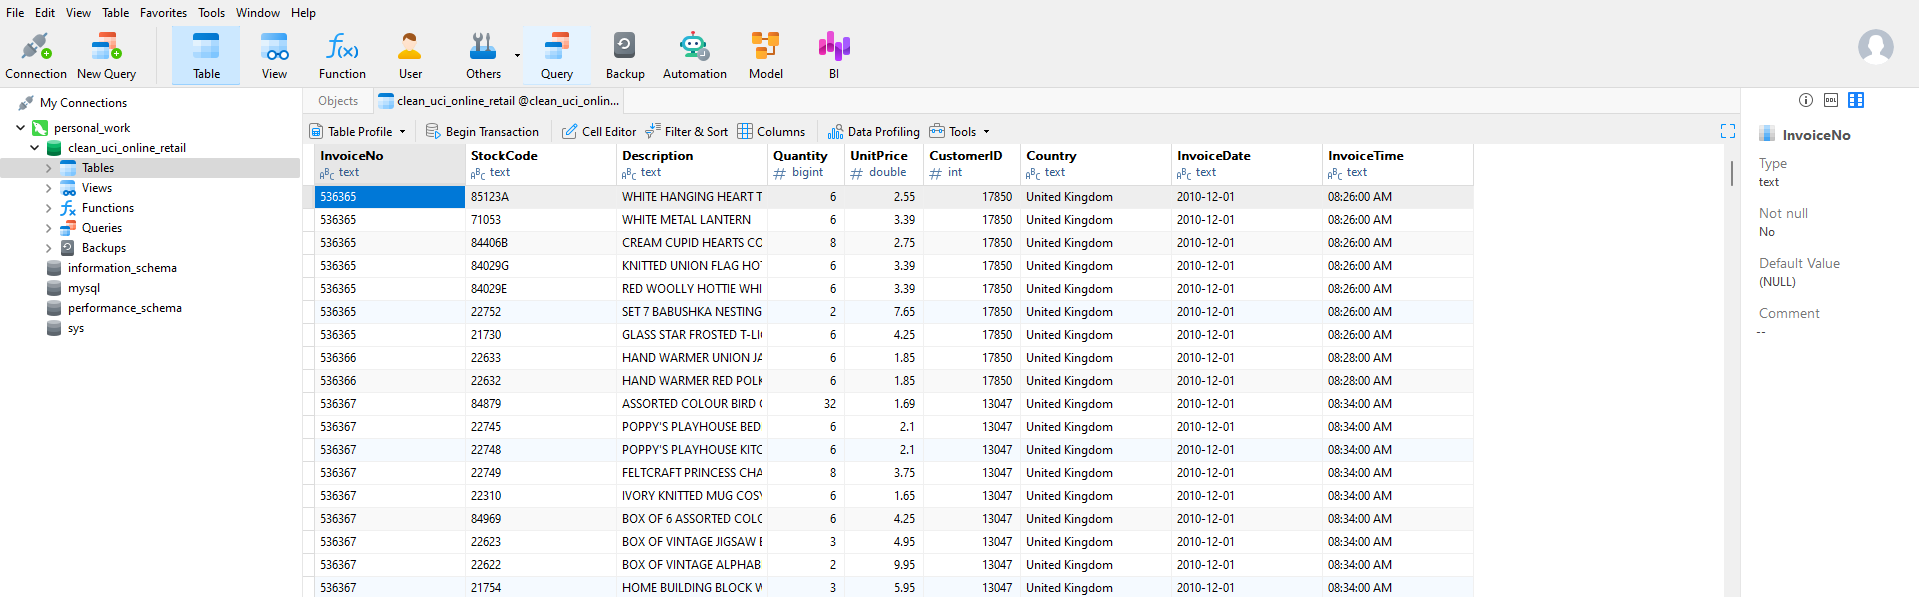